# Data Exploration
In this notebook I explore the cleaned and preprocessed datasets. We also create some simple regression models with some basic features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc={'figure.figsize':(10,15)})

In [2]:
# Explore cleaned dataset
df = pd.read_csv("../ads_thesis/data/data_cleaned.csv")

# Or, explore original dataset
#df = pd.read_csv("../ads_thesis/data/data.csv")
df.head()

text             examen  \
0  De bewering van Kleenex is ongefundeerd aangez...  T81-210040098.txt   
1  Eén op de vijf mensen heeft last van hooikoort...  T81-210040100.txt   
2  Wij van next.checkt vinden de bewering van Kle...  T81-210040101.txt   
3  De bewering van Kleenex is ongefundeerd want h...  T81-210040102.txt   
4  Volgens zakdoekjesproducent Kleenex heeft hooi...  T81-210040105.txt   

  schooltype  id toets_id  school_id  leerling_id  T3F_54 folder  word_count  \
0        vwo  P1      T81         80           98      10    T81         145   
1        vwo  P2      T81         80          100      13    T81         149   
2        vwo  P3      T81         80          101      11    T81         142   
3        vwo  P4      T81         80          102       9    T81         143   
4        vwo  P6      T81         80          105      13    T81         149   

   nr_unreadable  
0              0  
1              0  
2              0  
3              0  
4              0

In [3]:
# Rename column
df.rename(columns={"T3F_54": "score"}, inplace=True)
df.head()

text             examen  \
0  De bewering van Kleenex is ongefundeerd aangez...  T81-210040098.txt   
1  Eén op de vijf mensen heeft last van hooikoort...  T81-210040100.txt   
2  Wij van next.checkt vinden de bewering van Kle...  T81-210040101.txt   
3  De bewering van Kleenex is ongefundeerd want h...  T81-210040102.txt   
4  Volgens zakdoekjesproducent Kleenex heeft hooi...  T81-210040105.txt   

  schooltype  id toets_id  school_id  leerling_id  score folder  word_count  \
0        vwo  P1      T81         80           98     10    T81         145   
1        vwo  P2      T81         80          100     13    T81         149   
2        vwo  P3      T81         80          101     11    T81         142   
3        vwo  P4      T81         80          102      9    T81         143   
4        vwo  P6      T81         80          105     13    T81         149   

   nr_unreadable  
0              0  
1              0  
2              0  
3              0  
4              0

## Plot distributions

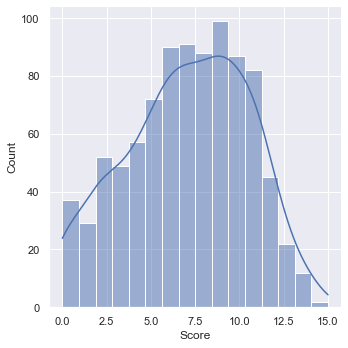

In [4]:
# How many summaries do we have per grade?
fig = sns.displot(data=df, x = "score", bins = 16, kde=True)
fig.set_axis_labels('Score', 'Count')

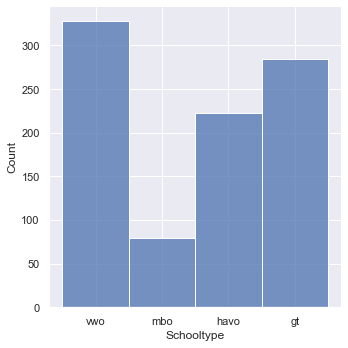

In [5]:
# How many summaries do we have per schooltype?
fig = sns.displot(data=df, x = "schooltype")
fig.set_axis_labels('Schooltype', 'Count')

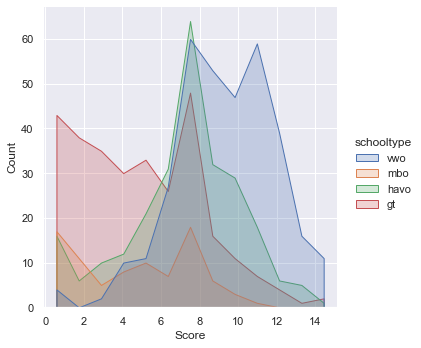

In [17]:
# Distribution of grade per schooltype
# We see that MBO and GT tend to score lower, VWO and HAVO score higher
fig = sns.displot(data=df, x = "score", hue="schooltype", element='poly')
fig.set_axis_labels('Score', 'Count')

Text(0, 0.5, 'Schooltype')

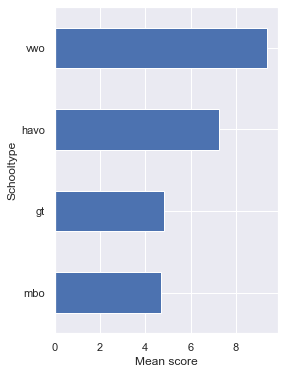

In [6]:
# Plot mean grade per schooltype
sns.set(rc={'figure.figsize':(4,6)})
df.groupby(['schooltype']).mean()['score'].sort_values().plot(kind='barh')
plt.xlabel('Mean score')
plt.ylabel('Schooltype')


In [7]:
# Mean grade per schooltype
df.groupby(['schooltype']).mean()['score'].sort_values()


schooltype
mbo     4.708861
gt      4.823944
havo    7.246637
vwo     9.384146
Name: score, dtype: float64

In [8]:
df.groupby(['schooltype']).count()['score']

schooltype
gt      284
havo    223
mbo      79
vwo     328
Name: score, dtype: int64

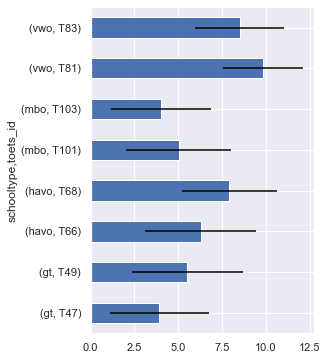

In [10]:
# For VWO, HAVO and GT there seem to be some differences between the different tests. Might be useful to include toets_id in our model.

plt.clf()
ax = plt.gca()

# Plot the mean grade per schooltype and toets_id
df.groupby(['schooltype', 'toets_id']).mean()['score'].plot(kind='barh')

# generate a dataframe with means and standard deviations
grouped_df=df.groupby(['schooltype', 'toets_id']).agg([np.mean,np.std])

# flatten column names
grouped_df.columns = [col for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()

# Get mean and std for each row
for i,(index,row) in enumerate(grouped_df.iterrows()):
    name = row.name
    mean = row[('score', 'mean')]
    stddev = row[('score', 'std')]

    # plot the line for this group
    ax.hlines(y=i,xmin=mean-stddev,xmax=mean+stddev, color='black')

plt.show()

Text(0, 0.5, 'Schooltype, Test id')

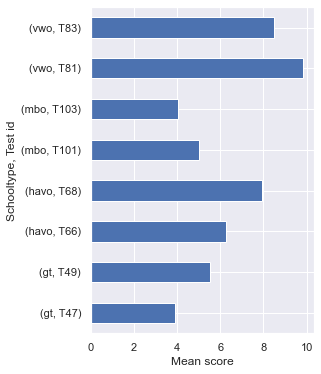

In [11]:
df.groupby(['schooltype', 'toets_id']).mean()['score'].plot(kind='barh')
plt.xlabel('Mean score')
plt.ylabel('Schooltype, Test id')

<AxesSubplot:ylabel='schooltype,toets_id'>

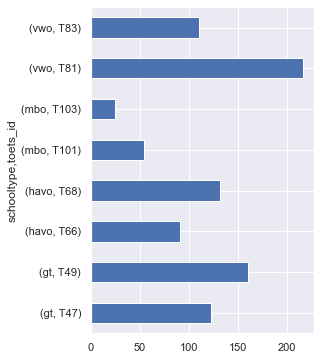

In [12]:
# Count per schooltype and toets_id
df.groupby(['schooltype', 'toets_id']).count()['score'].plot(kind='barh')

## Exploring the text column

In [13]:
# Add word count column
df['word_count'] = df.text.str.split().str.len()

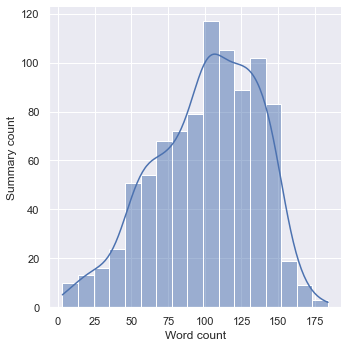

In [14]:
# Plot distribution of word count
fig = sns.displot(df.word_count, kde=True)
fig.set_axis_labels('Word count', 'Summary count')

Text(0, 0.5, 'Score')

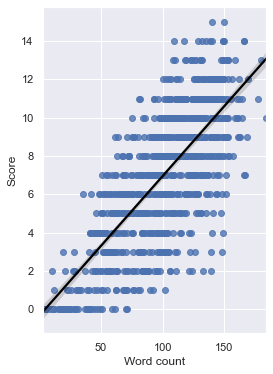

In [15]:
# Plot word count vs grade - there is a clear positive correlation. Word count could thus be a good predictor of grade.
fig = sns.regplot(y=df.score, x=df.word_count, line_kws={"color": "black"})
plt.xlabel('Word count')
plt.ylabel('Score')

Text(0, 0.5, 'Mean word count')

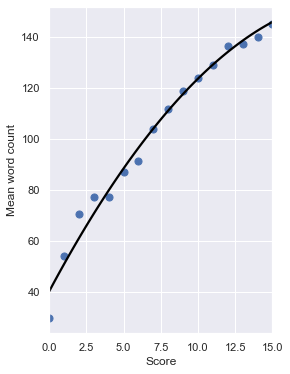

In [16]:
# This plot shows for every possible word_count the mean grade.
sns.regplot(x=df.score, y=df.word_count, x_estimator=np.mean,
                 order=2, ci=None, line_kws={"color": "black"})

plt.xlabel('Score')
plt.ylabel('Mean word count')

## Popular words per grade

In order to look at the occurances of words we first have to preprocess the summaries. The implementation of this can be found in the notebook data_preprocessing. In this section we look into different word use per schooltype or grade.

In the preprocessed dataframe we have the following extra columns: <br>
1. tokens: sentences split in words, all lower case without punctuation <br>
2. lemmas root form of words, stopwords removed <br>

In [17]:
# Import preprocessed dataset
df = pd.read_pickle("data/data_preprocessed_lemmas")
df.head()

text             examen  \
0  De bewering van Kleenex is ongefundeerd aangez...  T81-210040098.txt   
1  Eén op de vijf mensen heeft last van hooikoort...  T81-210040100.txt   
2  Wij van next.checkt vinden de bewering van Kle...  T81-210040101.txt   
3  De bewering van Kleenex is ongefundeerd want h...  T81-210040102.txt   
4  Kleenex beweert dat een op de vijf mensen in N...  T81-210040103.txt   

  schooltype  id toets_id  school_id  leerling_id  T3F_54 folder  word_count  \
0        vwo  P1      T81         80           98      10    T81         145   
1        vwo  P2      T81         80          100      13    T81         149   
2        vwo  P3      T81         80          101      11    T81         142   
3        vwo  P4      T81         80          102       9    T81         143   
4        vwo  P5      T81         80          103       8    T81         110   

   nr_unreadable                                             tokens  \
0              0  [de, bewering, van, kleenex, is, ongefundeerd,...   
1              0  [een, op, de, vijf, mensen, heeft, last, van, ...   
2              0  [wij, van, next.checkt, vinden, de, bewering, ...   
3              0  [de, bewering, van, kleenex, is, ongefundeerd,...   
4              2  [kleenex, beweert, dat, een, op, de, vijf, men...   

   nr_spelling_errors                                          stopwords  \
0                  11  [de, van, is, aangezien, haar, niet, zijn, de,...   
1                  12  [een, op, de, hebben, van, en, dat, aldus, dez...   
2                   3  [wij, van, de, van, dat, een, op, de, hebben, ...   
3                   5  [de, van, is, want, het, om, een, te, van, het...   
4                   8  [dat, een, op, de, in, van, hebben, en, dat, d...   

   nr_stopwords                                             lemmas  
0            75  [bewering, kleenex, ongefundeerd, bron, contro...  
1            80  [vijf, mens, last, hooikoorts, aandeel, groeie...  
2            76  [next.checkt, vinden, bewering, kleenex, ongef...  
3            78  [bewering, kleenex, ongefundeerd, blijken, las...  
4            62  [kleenex, beweren, vijf, mens, nederland, last...

In [18]:
from collections import Counter
import itertools
from wordcloud import WordCloud

In [20]:
# Make lists with words from the stopword-removal column, 
# One list for the high grades (above 9) and one list with low grades (below 5)
low_grade_stop = list(itertools.chain.from_iterable(df[df.T3F_54 <= 5].lemmas.tolist()))
high_grade_stop = list(itertools.chain.from_iterable(df[df.T3F_54 > 9].lemmas.tolist()))

In [21]:
# Function to create a world cloud
def plot_words(tokens, title = ''):
    word_counts = Counter(tokens).most_common()[:30]
    wordcloud = WordCloud(colormap='Dark2', background_color="white",).generate_from_frequencies(dict(word_counts))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, size = 20)
    plt.show()

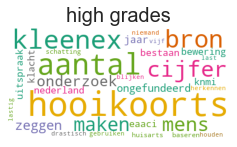

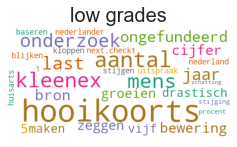

In [22]:
# We can see here that most frequent words are about the same for texts with high grades and texts with lows grades
plot_words(high_grade_stop, "high grades")
plot_words(low_grade_stop, 'low grades')

In [23]:
# Here we compare the top 30 words and only take those that are not present in the top 30 of the other group. (Thus, the distinct words)
only_low_grade = list(set(low_grade_stop[:30]) - set(high_grade_stop[:30]))
only_high_grade = list(set(high_grade_stop[:30]) - set(low_grade_stop[:30]))

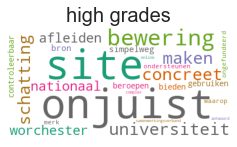

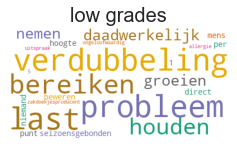

In [24]:
# Here we can which words are popular in texts with high grades and not in texts with low grades (and vice versa)
plot_words(only_high_grade, 'high grades')
plot_words(only_low_grade, 'low grades')

## Stopword use, word count and spelling errors

Text(0, 0.5, 'Number of stopwords')

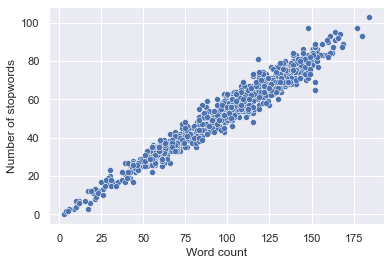

In [47]:
# Clearly, to longer the text the more stopwords used
sns.scatterplot(data=df, y="nr_stopwords", x="word_count")

plt.xlabel('Word count')
plt.ylabel('Number of stopwords')

Text(0, 0.5, 'Number spelling errors')

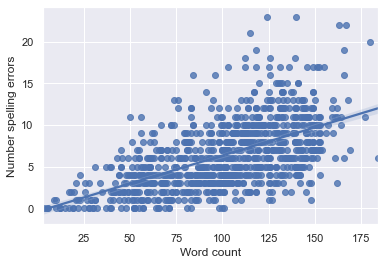

In [48]:
# Also, the longer the summary the more spelling errors were made
sns.regplot(data=df, y="nr_spelling_errors", x="word_count")
plt.xlabel('Word count')
plt.ylabel('Number spelling errors')

<AxesSubplot:xlabel='ratio', ylabel='T3F_54'>

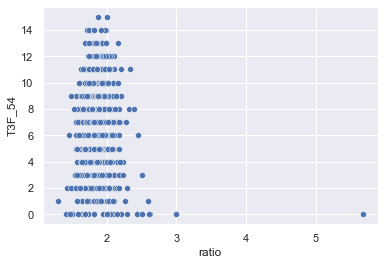

In [131]:
# Basically, for all grades the ratio of word_count/stopwords is equal
df['ratio'] = df.word_count / df.nr_stopwords
sns.scatterplot(data=df, x="ratio", y="T3F_54")

<AxesSubplot:xlabel='ratio', ylabel='T3F_54'>

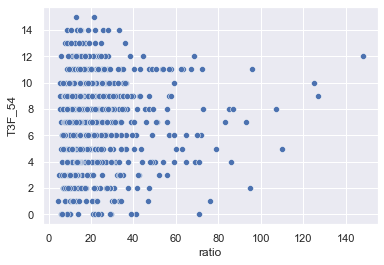

In [132]:
# Also, for all grade the ratio word_count/nr_spelling_errors is the same
df['ratio'] = df.word_count / df.nr_spelling_errors
sns.scatterplot(data=df, x="ratio", y="T3F_54")

In [63]:
# Show correlations
df[['T3F_54', 'word_count', 'nr_spelling_errors', 'nr_unreadable', 'nr_stopwords']].corr()[['T3F_54', 'word_count', 'nr_spelling_errors', 'nr_unreadable', 'nr_stopwords']]

T3F_54  word_count  nr_spelling_errors  nr_unreadable  \
T3F_54              1.000000    0.733623            0.379101       0.011722   
word_count          0.733623    1.000000            0.578726      -0.002112   
nr_spelling_errors  0.379101    0.578726            1.000000       0.171801   
nr_unreadable       0.011722   -0.002112            0.171801       1.000000   
nr_stopwords        0.720619    0.978525            0.513257      -0.018296   

                    nr_stopwords  
T3F_54                  0.720619  
word_count              0.978525  
nr_spelling_errors      0.513257  
nr_unreadable          -0.018296  
nr_stopwords            1.000000